In [1]:
from itertools import islice
import json
import pickle

import matplotlib.pylab as pl
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import torch

In [2]:
class bcolors:
    R = '\033[31m'
    G = '\033[32m'
    Y = '\033[33m'
    B = '\033[34m'
    ENDC = '\033[0m'

In [3]:
# for i in range(128):
#     print(i, f'\033[{i}m', 'text', bcolors.ENDC)

In [4]:
input_dir = '/work/yu_gai/cfq/data/cfq'

In [5]:
idx2tok, _ = pickle.load(open(f'{input_dir}/tok-vocab.pickle', 'rb'))
idx2rel, rel2idx = pickle.load(open(f'{input_dir}/rel-vocab.pickle', 'rb'))

In [6]:
df = sqlCtx.read.parquet(f'/data/yu_gai/cfq/dataset.parquet/').sort('index').persist()
question = df.rdd.map(lambda r: r['questionPatternModEntities']).collect()
sparql = df.rdd.map(lambda r: r['sparqlPatternModEntities']).collect()

In [21]:
# globals().update(np.load(f'/data/yu_gai/cfq/2020-09-08@06:41:45@como#7398/99-train.npz'))
globals().update(np.load(f'/data/yu_gai/cfq/None_112020_182131/test_dict.npz'))  # MCD1
# globals().update(np.load(f'/data/yu_gai/cfq/None_111820_222445/test_dict.npz'))  # MCD2
# globals().update(np.load(f'/data/yu_gai/cfq/None_111820_223026/test_dict.npz'))  # MCD3

In [8]:
pred = np.load(f'/data/yu_gai/cfq/None_111120_101659/test_dict.npz')

In [9]:
dat = np.load(f'{input_dir}/data.npz')
split = np.load(f'{input_dir}/splits/mcd1.npz')

disp = np.hstack([[0], dat['n'][:-1]]).cumsum().repeat(dat['m'])
src, dst = dat['tok'][dat['src'] + disp], dat['tok'][dat['dst'] + disp]

urv = np.vstack([src, dat['rel'], dst]).T
uniq, inv, n = np.unique(urv, return_inverse=True, return_counts=True, axis=0)
urvn = np.concatenate([urv, n[inv].reshape([-1, 1])], axis=1)

idx = np.arange(len(dat['n'])).repeat(dat['m'])
masks = {k : np.isin(idx, v) for k, v in split.items()}
dfs = {k : pd.DataFrame(urvn[v], columns=list('urvn')) for k, v in masks.items()}

In [80]:
idx, rel = np.nonzero(rel_true & (rel_pred ^ rel_true))
err, n = np.unique(np.vstack([pred['v'][idx], rel, pred['u'][idx]]).T, axis=0, return_counts=True)
df_err = pd.DataFrame(np.concatenate([err, n.reshape([-1, 1])], axis=1), columns=list('urvn'))

NameError: name 'pred' is not defined

In [ ]:
df_err.sort_values('n', ascending=False)

In [ ]:
freq = df_err.merge(dfs['testIdxs'], on=list('urv'), how='inner').apply((lambda x: x['n_x'] / x['n_y']), axis=1)
df_err['freq'] = freq

In [81]:
df = df_err.merge(dfs['trainIdxs'], on=list('urv'), how='inner').drop_duplicates()

NameError: name 'df_err' is not defined

In [82]:
pl.plot(df['freq'].values, df['n_y'].values, 'o')
pl.xlabel('test')
pl.ylabel('training')

AnalysisException: Cannot resolve column name "freq" among (complexityMeasures, expectedResponse, expectedResponseWithMids, index, question, questionPatternModEntities, questionWithBrackets, questionWithMids, ruleIds, ruleTree, sparql, sparqlPattern, sparqlPatternModEntities);

Text(0, 0.5, 'training')

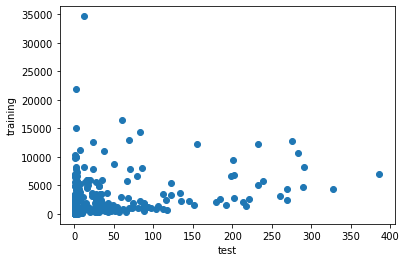

In [103]:
pl.plot(df['n_x'].values, df['n_y'].values, 'o')
pl.xlabel('test')
pl.ylabel('training')

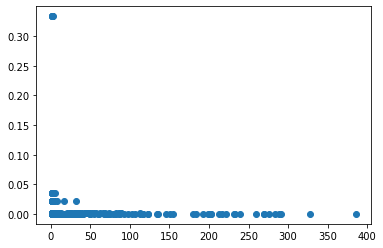

In [110]:
pl.plot(df['n_x'].values, df['freq'].values, 'o')

In [87]:
for v, r, u, n, _ in [df for c in df_err.columns]:
    prefix = bcolors.R + '[FN]' if b else bcolors.B + '[FP]'
    print(prefix, idx2tok[v], idx2rel[r], idx2tok[u], c, bcolors.ENDC)

KeyError: 'n'

In [15]:
np.set_printoptions(precision=5)

In [17]:
np.set_printoptions?

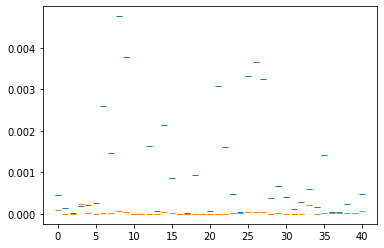

In [83]:
pl.plot(np.arange(len(idx2rel)), np.mean(rel_true & ~rel_pred, axis=0), '_', label='FN')
pl.plot(np.arange(len(idx2rel)), np.mean(~rel_true & rel_pred, axis=0), '_', label='FP')

<ipython-input-84-a4e6ead0c79a>:1: RuntimeWarning: invalid value encountered in true_divide
  pl.plot(np.arange(len(idx2rel)), np.sum(rel_true & ~rel_pred, 0) / np.sum(rel_true, 0), 'o', label='FN')


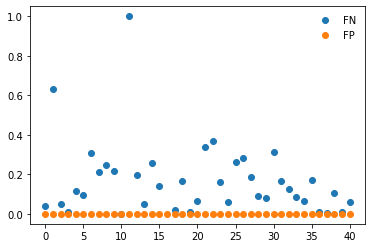

In [84]:
pl.plot(np.arange(len(idx2rel)), np.sum(rel_true & ~rel_pred, 0) / np.sum(rel_true, 0), 'o', label='FN')
pl.plot(np.arange(len(idx2rel)), np.sum(~rel_true & rel_pred, 0) / np.sum(~rel_true, 0), 'o', label='FP')
pl.legend(framealpha=0)

In [23]:
fn = rel_true & ~rel_pred
fp = ~rel_true & rel_pred

In [24]:
np.sum(np.any(fn, 1) & ~np.any(fp, 1))

8343

In [25]:
np.sum(np.any(fp, 1) & ~np.any(fn, 1))

243

In [26]:
np.sum(np.any(fp, 1) & np.any(fn, 1))

144

In [27]:
np.sum(~em.astype(bool))

4377

In [33]:
p_fn = 1 / (1 + np.exp(-logit[fn]))

In [34]:
p_fn.mean(), p_fn.std()

(0.0617973, 0.11806416)

In [56]:
np.add.at?

In [85]:
import random

In [94]:
random.shuffle?

In [19]:
indptr = np.cumsum(np.hstack([[0], n * n]))
for b, i, j, k in islice(filter(lambda x: not x[0], zip(em, cfq_idx, indptr[:-1], indptr[1:])), 50):
    print(question[i])
    print(sparql[i])

    u_, v_ = u[j : k], v[j : k]
    rel_true_ = rel_true[j : k]
    e, r = np.nonzero(rel_pred[j : k] != rel_true_)
    for e_, r_ in zip(e, r):
        prefix = bcolors.R + '[FN]' if rel_true_[e_, r_] else bcolors.B + '[FP]'
        print(prefix, idx2tok[v_[e_]], idx2rel[r_], idx2tok[u_[e_]], bcolors.ENDC)
    
    print()

Did M0 's writer , editor , cinematographer , producer , and director marry and influence M1
SELECT count(*) WHERE {
?x0 ns:film.cinematographer.film M0 .
?x0 ns:film.director.film M0 .
?x0 ns:film.editor.film M0 .
?x0 ns:film.producer.film|ns:film.production_company.films M0 .
?x0 ns:film.writer.film M0 .
?x0 ns:influence.influence_node.influenced M1 .
?x0 ns:people.person.spouse_s/ns:people.marriage.spouse|ns:fictional_universe.fictional_character.married_to/ns:fictional_universe.marriage_of_fictional_characters.spouses M1 .
FILTER ( ?x0 != M1 )
}
[FN] ?x0 ns:film.editor.film M0 

Did M0 's cinematographer and writer executive produce and direct M1 , M2 , and M3
SELECT count(*) WHERE {
?x0 ns:film.cinematographer.film M0 .
?x0 ns:film.director.film M1 .
?x0 ns:film.director.film M2 .
?x0 ns:film.director.film M3 .
?x0 ns:film.producer.films_executive_produced M1 .
?x0 ns:film.producer.films_executive_produced M2 .
?x0 ns:film.producer.films_executive_produced M3 .
?x0 ns:film.writer.

In [ ]:
dat = np.load('/work/yu_gai/cfq/data/cfq/data.npz')

In [ ]:
list(dat.keys())

In [ ]:
cm = metrics.multilabel_confusion_matrix(rel_true, rel_pred)
pl.imshow(cm)
pl.xlabel('pred')
pl.ylabel('true')
pl.colorbar()

In [ ]:
cm

In [ ]:
u, c = np.unique(rel_true, return_counts=True)
pl.plot(c / c.sum(), np.diag(cm), 'bo')
pl.xlabel('freq')
pl.ylabel('tpr')

In [ ]:
diag = np.diag(cm)
list(zip(np.sort(diag), (idx2rel[idx] for idx in np.argsort(diag))))